**Full Name:** Mohammed Amine Rourrou
**Course:** CSC3348
**Assignment 1:** Build Multi-Layer Perceptron (MLP) model

## 1- Import Libraires
In this section we are going to import all required libaries for data handling; visualization, sentiment features extraction, and building MLP model

In [6]:
import pandas as pd
import re
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [7]:
df = pd.read_csv("IMDB Dataset.csv")

In [8]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [9]:
df.columns

Index(['review', 'sentiment'], dtype='str')

In [10]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   review     50000 non-null  str  
 1   sentiment  50000 non-null  str  
dtypes: str(2)
memory usage: 781.4 KB


In [11]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

## 2. Exploratory Data Analysis (EDA)
In this section, we explore the dataset to understand:

- Data structure and types
- Class distribution
- Missing values
- Duplicate samples
- Review length distribution

This helps us understand the quality and balance of the dataset before building the model.

In [12]:
df.shape

(50000, 2)

In [13]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [15]:
df.duplicated().sum()

np.int64(418)

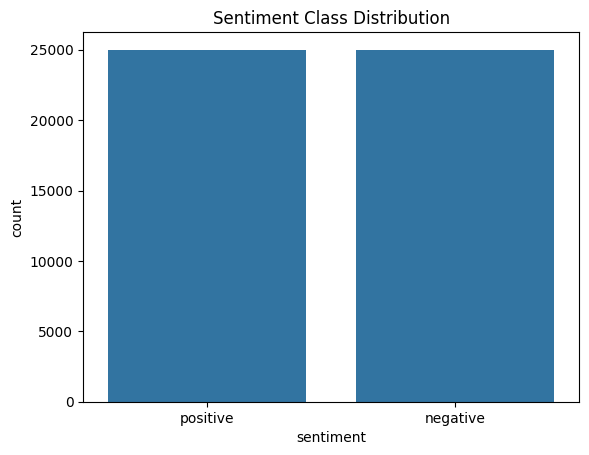

In [16]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Class Distribution")
plt.show()

In [17]:
df['review_length'] = df['review'].apply(len)
df

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642
49997,I am a Catholic taught in parochial elementary...,negative,1280
49998,I'm going to have to disagree with the previou...,negative,1234


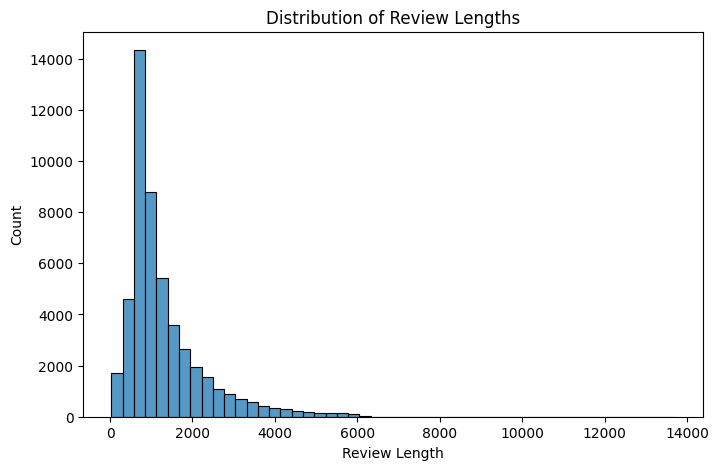

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['review_length'], bins=50)
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.show()

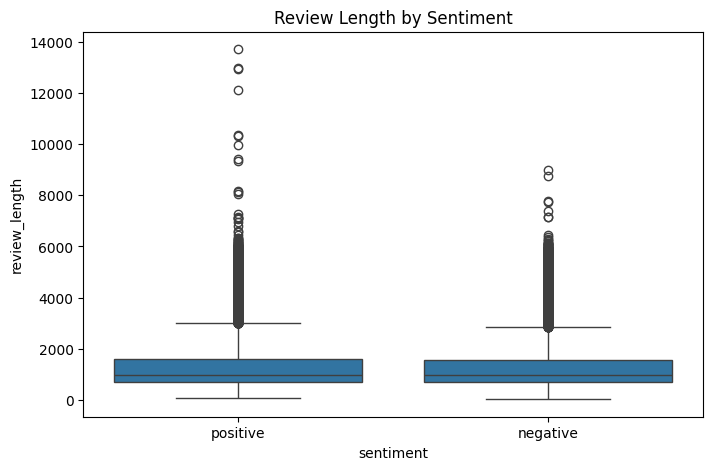

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title("Review Length by Sentiment")
plt.show()

* The review lengths vary significantly, showing that the dataset contains both short and long reviews.
There is no major difference in length between positive and negative reviews.
* The dataset is clean, balanced, and suitable for sentiment classification.
No major preprocessing is required before feature extraction.

## 3. Text Preprocessing
In this step, we perform light text cleaning to standardize the reviews.

The preprocessing includes:
- Converting text to lowercase
- Removing extra spaces
- Removing basic unwanted characters


In [20]:
def clean_text(text):
    # Optional: Keep capitalization for emphasis
    # text = text.lower()  # Comment this out to keep caps
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Keep letters (both cases), spaces, and VADER punctuation
    text = re.sub(r'[^a-zA-Z\s!?.,]', '', text)  # Added A-Z and punctuation
    
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [21]:
df['clean_review'] = df['review'].apply(clean_text)

In [22]:
df[['review', 'clean_review']].head()

,review,clean_review
0,One of the other reviewers has mentioned that ...,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,Basically theres a family where a little boy J...
4,"Petter Mattei's ""Love in the Time of Money"" is...",Petter Matteis Love in the Time of Money is a ...


* The text has been normalized by converting it to lowercase, removing HTML tags,
special characters, and extra spaces.  
This ensures cleaner input for sentiment feature extraction while preserving the
semantic meaning of the reviews.

* Lowercasing was intentionally avoided because capitalization carries
sentiment intensity in VADER (words in ALL CAPS are interpreted
as stronger emotional expressions). Therefore, the original casing was preserved.

In [23]:
df[['clean_review']].head()

,clean_review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...
3,Basically theres a family where a little boy J...
4,Petter Matteis Love in the Time of Money is a ...


In [24]:
df['clean_review'][123]

'Ah yes the s , a time of Reaganomics and Sly , Chuck and a host of other action stars hiding in a remote jungle blowing away commies . At the time I couldnt believe how movies like RAMBO , MISSING IN ACTION and UNCOMMON VALOR And who can forget the ridiculous RED DAWN ? made money at the box office , theyre turgid action crap fests with a rather off putting right wing agenda and they have dated very badly . TROMAS WAR is a tongue in cheek take on these type of movies but youve got to ask yourself did they need spoofing in the first place ? Of course not . TROMAS WAR lacks any sort of sophistication though it does make the point that theres no real difference between right wing tyrants and left wing ones and sometimes feels more like a grade z movie than a send up . Maybe it is ?'

In [25]:
df['review'][123]

'Ah yes the 1980s , a time of Reaganomics and Sly , Chuck and a host of other action stars hiding in a remote jungle blowing away commies . At the time I couldn`t believe how movies like RAMBO , MISSING IN ACTION and UNCOMMON VALOR ( And who can forget the ridiculous RED DAWN ? ) made money at the box office , they`re turgid action crap fests with a rather off putting right wing agenda and they have dated very badly . TROMA`S WAR is a tongue in cheek take on these type of movies but you`ve got to ask yourself did they need spoofing in the first place ? Of course not . TROMA`S WAR lacks any sort of sophistication - though it does make the point that there`s no real difference between right wing tyrants and left wing ones - and sometimes feels more like a grade z movie than a send up . Maybe it is ?'

## 4. Feature Engineering (Sentence-Level Polarity)
We convert each review into numerical features using:
- VADER sentiment scores (neg, neu, pos, compound)
- TextBlob polarity score (polarity)

These are sentence-level polarity features as required by the assignment.
**Optionally**, we combine both (hybrid approach) into one feature vector.

In [26]:
sia = SentimentIntensityAnalyzer()

def vader_features(text):
    scores = sia.polarity_scores(text)
    return pd.Series({
        'vader_neg': scores['neg'],
        'vader_neu': scores['neu'],
        'vader_pos': scores['pos'],
        'vader_compound': scores['compound']
    })

def textblob_polarity(text):
    return TextBlob(text).sentiment.polarity
    

In [27]:
df[['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']]= df['clean_review'].apply(vader_features)

df['tb_polarity'] = df['clean_review'].apply(textblob_polarity)

df[['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound', 'tb_polarity']].head()

,vader_neg,vader_neu,vader_pos,vader_compound,tb_polarity
0,0.207,0.744,0.049,-0.9951,0.023433
1,0.054,0.756,0.190,0.9704,0.109722
2,0.109,0.660,0.232,0.9712,0.346324
3,0.145,0.786,0.069,-0.9213,-0.057813
4,0.053,0.795,0.152,0.9744,0.217952


In [28]:
feature_cols = ['vader_neg' , 'vader_neu', 'vader_pos', 'vader_compound', 'tb_polarity']
X = df[feature_cols].values

In [29]:
df[feature_cols].describe()

,vader_neg,vader_neu,vader_pos,vader_compound,tb_polarity
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.098794,0.755787,0.145418,0.294396,0.102474
std,0.060427,0.070005,0.067610,0.809398,0.163492
min,0.000000,0.336000,0.000000,-0.999800,-1.000000
25%,0.055000,0.712000,0.098000,-0.703300,0.003067
50%,0.091000,0.759000,0.136000,0.820100,0.103455
75%,0.135000,0.804000,0.183000,0.970800,0.202520
max,0.580000,1.000000,0.548000,0.999900,1.000000


In [30]:
sample_idx = 0
print("Review snippet:", df['clean_review'].iloc[sample_idx][:500], "...")
print("Sentiment label:", df['sentiment'].iloc[sample_idx])
print("VADER:", vader_features(df['clean_review'].iloc[sample_idx]))
print("TextBlob polarity:", textblob_polarity(df['clean_review'].iloc[sample_idx]))

Review snippet: One of the other reviewers has mentioned that after watching just Oz episode youll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname gi ...
Sentiment label: positive
VADER: vader_neg         0.2070
vader_neu         0.7440
vader_pos         0.0490
vader_compound   -0.9951
dtype: float64
TextBlob polarity: 0.023433179723502305


Each review is now represented as a small numeric feature vector based on sentence-level
polarity scores. This satisfies the assignment requirement of using lexicon-based
polarity features (VADER/TextBlob) rather than word-level vectors or embeddings.

In [31]:
df

,review,sentiment,review_length,clean_review,vader_neg,vader_neu,vader_pos,vader_compound,tb_polarity
0,One of the other reviewers has mentioned that ...,positive,1761,One of the other reviewers has mentioned that ...,0.207,0.744,0.049,-0.9951,0.023433
1,A wonderful little production. <br /><br />The...,positive,998,A wonderful little production. The filming tec...,0.054,0.756,0.190,0.9704,0.109722
2,I thought this was a wonderful way to spend ti...,positive,926,I thought this was a wonderful way to spend ti...,0.109,0.660,0.232,0.9712,0.346324
3,Basically there's a family where a little boy ...,negative,748,Basically theres a family where a little boy J...,0.145,0.786,0.069,-0.9213,-0.057813
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,Petter Matteis Love in the Time of Money is a ...,0.053,0.795,0.152,0.9744,0.217952
...,...,...,...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008,I thought this movie did a down right good job...,0.048,0.748,0.204,0.9890,0.394425
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,"Bad plot, bad dialogue, bad acting, idiotic di...",0.171,0.711,0.118,-0.6693,-0.276190
49997,I am a Catholic taught in parochial elementary...,negative,1280,I am a Catholic taught in parochial elementary...,0.211,0.679,0.110,-0.9851,0.056984
49998,I'm going to have to disagree with the previou...,negative,1234,Im going to have to disagree with the previous...,0.118,0.801,0.082,-0.8657,-0.048663


# 5. Label Encoding
We convert the sentiment labels into binary values:
- 0 = negative
- 1 = positive

In [32]:
label_map = {'positive': 1, 'negative' : 0 }
df['label'] = df['sentiment'].map(label_map)

In [33]:
print(df['label'].value_counts())
df[['sentiment', 'label']].head()

label
1    25000
0    25000
Name: count, dtype: int64


,sentiment,label
0,positive,1
1,positive,1
2,positive,1
3,negative,0
4,positive,1


In [34]:
print("Number of unmapped labels:", df['label'].isna().sum())

Number of unmapped labels: 0


In [35]:
y = df['label'].values

In [36]:
y.shape

(50000,)

In [37]:
X.shape

(50000, 5)

In [38]:
df

,review,sentiment,review_length,clean_review,vader_neg,vader_neu,vader_pos,vader_compound,tb_polarity,label
0,One of the other reviewers has mentioned that ...,positive,1761,One of the other reviewers has mentioned that ...,0.207,0.744,0.049,-0.9951,0.023433,1
1,A wonderful little production. <br /><br />The...,positive,998,A wonderful little production. The filming tec...,0.054,0.756,0.190,0.9704,0.109722,1
2,I thought this was a wonderful way to spend ti...,positive,926,I thought this was a wonderful way to spend ti...,0.109,0.660,0.232,0.9712,0.346324,1
3,Basically there's a family where a little boy ...,negative,748,Basically theres a family where a little boy J...,0.145,0.786,0.069,-0.9213,-0.057813,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,Petter Matteis Love in the Time of Money is a ...,0.053,0.795,0.152,0.9744,0.217952,1
...,...,...,...,...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008,I thought this movie did a down right good job...,0.048,0.748,0.204,0.9890,0.394425,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,"Bad plot, bad dialogue, bad acting, idiotic di...",0.171,0.711,0.118,-0.6693,-0.276190,0
49997,I am a Catholic taught in parochial elementary...,negative,1280,I am a Catholic taught in parochial elementary...,0.211,0.679,0.110,-0.9851,0.056984,0
49998,I'm going to have to disagree with the previou...,negative,1234,Im going to have to disagree with the previous...,0.118,0.801,0.082,-0.8657,-0.048663,0


# 7. Train / Validation / Test Split
We split the dataset into three parts:
- Training set: used to learn the model parameters
- Validation set: used to monitor performance during training and tune decisions
- Test set: used only once at the end for final evaluation

In [39]:
X_train, X_temp, y_train, y_temp = train_test_split( 
    X, y, 
    test_size = 0.30,
    random_state = 42, 
    stratify = y
)

In [40]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size = 0.50,
    random_state = 42, 
    stratify = y_temp
)

In [41]:
print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape, y_val.shape)
print("Test: ", X_test.shape, y_test.shape)

Train: (35000, 5) (35000,)
Val:   (7500, 5) (7500,)
Test:  (7500, 5) (7500,)


In [42]:
def show_balance(name, labels):
    unique, counts = np.unique(labels, return_counts=True)
    dist = dict(zip(unique, counts))
    print(f"{name} balance:", dist)

show_balance("Train", y_train)
show_balance("Validation", y_val)
show_balance("Test", y_test)

Train balance: {np.int64(0): np.int64(17500), np.int64(1): np.int64(17500)}
Validation balance: {np.int64(0): np.int64(3750), np.int64(1): np.int64(3750)}
Test balance: {np.int64(0): np.int64(3750), np.int64(1): np.int64(3750)}


The dataset was split into training (70%), validation (15%), and test (15%) sets.
Stratified sampling was used to preserve the original class distribution in each subset.
The training set is used to learn the model parameters, the validation set is used
to monitor generalization during training, and the test set is reserved for final evaluation.

# 8. Multi-Layer Perceptron (MLP) Implementation
We implement an MLP from scratch using:
- ReLU activation for the hidden layer
- Sigmoid activation for the output layer
- Binary Cross-Entropy loss
- Gradient descent for training

**8.1 Activation Functions**

In [43]:
def relu(Z):
    return np.maximum(0,Z)

def relu_derivative(Z):
    return (Z>0).astype(float)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

**8.2 Initialize parameter**

In [44]:
np.random.seed(42)

input_size = X_train.shape[1] 
hidden_size = 8
output_size = 1

W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

**8.3 Forward propagation**

In [45]:
def forward(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    cache = (Z1, A1, Z2, A2)
    return A2, cache
    

**8.4 Binary Cross-Entropy loss**

In [46]:
def compute_loss(y, y_hat):
    m = y.shape[0]
    y = y.reshape(-1, 1)

    loss = -(1/m) * np.sum(
        y*np.log(y_hat + 1e-8) + (1-y)*np.log(1 - y_hat + 1e-8)
    )

    return loss


**8.5 Backpropagation**

In [47]:
def backward(X, y, cache):
    Z1, A1, Z2, A2 = cache 
    m = X.shape[0]
    y = y.reshape(-1,1)

    dZ2 = A2 - y
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis = 0, keepdims = True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)

    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2


    

**8.6 Gradient descent update**

In [48]:
def update_params(dW1, db1, dW2, db2, lr):
    global W1, b1, W2, b2

    W1-= lr * dW1
    b1-= lr * db1
    W2-= lr * dW2
    b2-= lr * db2

**8.7 Training loop**

In [49]:
epochs = 2000
lr = 0.1

train_losses = []
val_losses = []

for epoch in range(epochs):
    # Forward pass
    y_hat, cache = forward(X_train)

    # Loss
    train_loss = compute_loss(y_train, y_hat)
    train_losses.append(train_loss)

    # backward Pass
    grads = backward(X_train, y_train, cache)

    # Update Parameters
    update_params(*grads, lr)

    #Validation loss
    val_pred, _ = forward(X_val)
    val_loss = compute_loss(y_val, val_pred)
    val_losses.append(val_loss)

    
    print(f"Epoch {epoch} | Train loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

Epoch 0 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 1 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 2 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 3 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 4 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 5 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 6 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 7 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 8 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 9 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 10 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 11 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 12 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 13 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 14 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 15 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 16 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 17 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 18 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 19 | Train loss: 0.6931 | Val Loss: 0.6931
Epoch 20 | Train loss: 0.6931 

**8.8 Loss curves**

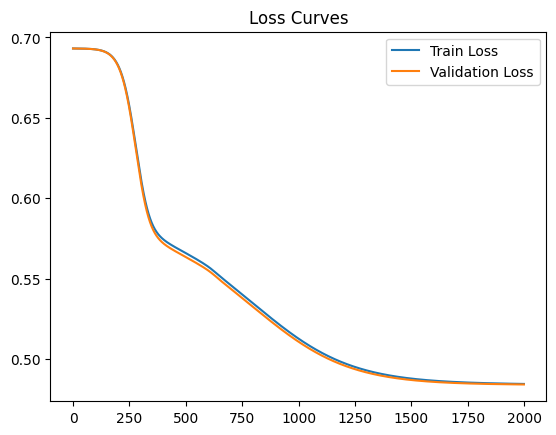

In [50]:
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.legend()
plt.title("Loss Curves")
plt.show()

# 9. Prediction Rule

The MLP outputs probabilities using the sigmoid function.
We convert probabilities to class labels using a threshold of 0.5:

- Probability ≥ 0.5 → 1 (positive)
- Probability < 0.5 → 0 (negative)

In [51]:
test_probs, _ = forward(X_test)

y_test_pred = (test_probs >= 0.5).astype(int).flatten()
print("First predicted labels:", y_test_pred[:20])

First predicted labels: [0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0]


In [52]:
# Checking first 20 samples
y_test_pred[:20] == y_test[:20]

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False])

# 10. Evaluation and Results Discussion

We evaluate the trained MLP using:
- Accuracy on the test set
- Confusion Matrix
- Classification report (precision/recall/F1)
- Loss curves (train vs validation)


In [53]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7676


In [54]:
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[2796  954]
 [ 789 2961]]


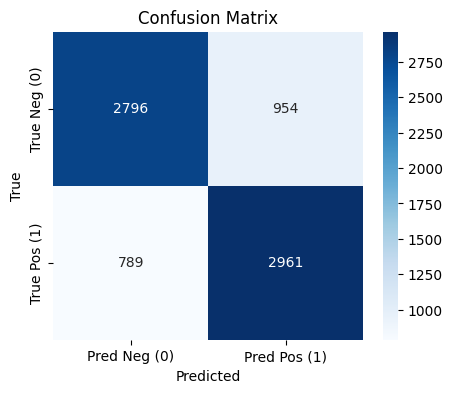

In [55]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred Neg (0)", "Pred Pos (1)"],
            yticklabels=["True Neg (0)", "True Pos (1)"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [56]:
print(classification_report(y_test, y_test_pred, target_names=["negative", "positive"]))

              precision    recall  f1-score   support

    negative       0.78      0.75      0.76      3750
    positive       0.76      0.79      0.77      3750

    accuracy                           0.77      7500
   macro avg       0.77      0.77      0.77      7500
weighted avg       0.77      0.77      0.77      7500



## Results Discussion

The MLP achieved a test accuracy of **76%**, which indicates that sentence-level
polarity features extracted from VADER and TextBlob contain strong sentiment
information for movie reviews.

Both training and validation losses decreased smoothly during training and remained
close to each other, showing that the model generalizes well and does not suffer from
significant overfitting.

Since the model relies only on five polarity-based features and does not use word-level
representations or embeddings, the performance is naturally limited. However, the
results demonstrate that lexicon-based sentiment scores alone can provide a meaningful
and computationally efficient solution for sentiment classification.

In [63]:
import pickle

model_params = {
    "W1": W1,
    "b1": b1,
    "W2": W2,
    "b2": b2
}

with open("../model/best_model.pkl", "wb") as f:
    pickle.dump(model_params, f)

In [64]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.savefig("../results/confusion_matrix.png")
plt.close()

In [66]:
plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.legend()
plt.title("Loss Curves")
plt.savefig("../results/loss_curves.png")
plt.close()

In [68]:
with open("../results/metrics.txt", "w") as f:
    f.write(f"Test Accuracy: {test_accuracy}\n")

In [69]:
discussion = """
The MLP achieved approximately 76% accuracy using only VADER and TextBlob
sentence-level polarity features. The loss curves show stable learning with
no overfitting.
"""

with open("../results/results_discussion.txt", "w") as f:
    f.write(discussion)